Baca Gambar
---

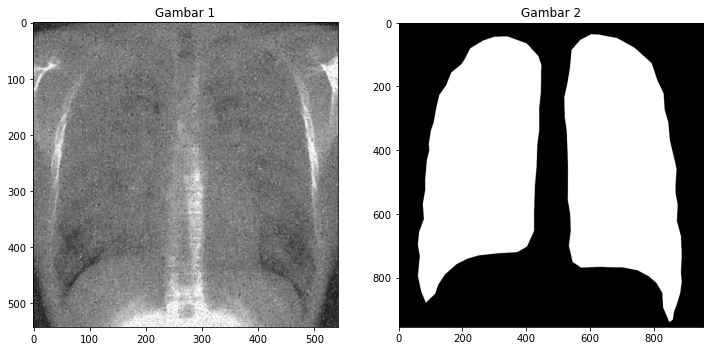

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Membaca gambar dalam mode skala abu-abu
imgGrayscale = cv.imread('covid_image.png', cv.IMREAD_GRAYSCALE)
imgGrayscale2 = cv.imread('Mask.png', cv.IMREAD_GRAYSCALE)

# Membuat sebuah gambar dengan dua subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Menampilkan gambar pertama dalam subplot pertama
axes[0].imshow(imgGrayscale, cmap='gray')
axes[0].set_title('Gambar 1')

# Menampilkan gambar kedua dalam subplot kedua
axes[1].imshow(imgGrayscale2, cmap='gray')
axes[1].set_title('Gambar 2')

# Menampilkan gambar-gambar tersebut
plt.show()


In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Membaca gambar dalam mode skala abu-abu
imgGrayscale = cv.imread('covid_image.png', cv.IMREAD_GRAYSCALE)
imgGrayscale2 = cv.imread('Mask.png', cv.IMREAD_GRAYSCALE)

# Menampilkan informasi tentang gambar pertama (Covid_image)
print('\nCovid_image Shape:')  # Menampilkan bentuk (shape) dari gambar
print(imgGrayscale.shape)      # Menampilkan tuple (tinggi, lebar) dari gambar
print(imgGrayscale.size)       # Menampilkan jumlah total elemen dalam gambar
print(imgGrayscale.dtype)      # Menampilkan tipe data dari gambar

# Menampilkan informasi tentang gambar kedua (Mask)
print('\nMask Shape:')         # Menampilkan bentuk (shape) dari gambar
print(imgGrayscale2.shape)      # Menampilkan tuple (tinggi, lebar) dari gambar
print(imgGrayscale2.size)       # Menampilkan jumlah total elemen dalam gambar
print(imgGrayscale2.dtype)      # Menampilkan tipe data dari gambar



Covid_image Shape:
(542, 542)
293764
uint8

Mask Shape:
(954, 955)
911070
uint8


Operasi Bitwise
untuk Mendapatkan
Fokus Gambar ParuParu
---

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Membaca gambar masker dan gambar COVID
imgmask = cv.imread('mask.png')
imgcovid = cv.imread('covid_image.png')
# Membuat region of interest (ROI) di gambar masker yang sesuai dengan ukuran gambar COVID
rows,cols,channels = imgcovid.shape
roi = imgmask[0:rows, 0:cols ]
# Membuat mask dari gambar COVID dan mask inversnya
img2gray = cv.cvtColor(imgcovid,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
# Membuat bagian latar belakang (img1_bg) dari ROI dengan menggabungkan ROI dengan mask invers
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
# Membuat bagian logo (img2_fg) dari gambar COVID dengan menggabungkan gambar COVID dengan mask
img2_fg = cv.bitwise_and(imgcovid,imgcovid,mask = mask)
# Menggabungkan bagian latar belakang (img1_bg) dan bagian logo (img2_fg) untuk mendapatkan citra gabungan (dst
dst = cv.add(img1_bg, img2_fg)
# Memasukkan citra gabungan (dst) ke dalam ROI gambar masker
imgmask[0:rows, 0:cols ] = dst

Noise Removal
(Menggunakan Filter
Spasial)
---

In [5]:
import cv2
import numpy as np
from skimage.util import random_noise
from matplotlib import pyplot as plt

# Load citra yang akan digunakan
img = cv2.imread('covid_image.png')
ori_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Menambahkan salt & pepper noise ke citra original.
noise_img = random_noise(ori_img, mode='s&p', amount=0.3)

# Fungsi diatas menghasilkan citra dengan nilai float
# yang berada pada rentang nilai [0,1], sehingga
# perlu diubah menjadi format uint8 dengan rentang
# nilai [0,255]
noise_img = np.array(255 * noise_img, dtype='uint8')

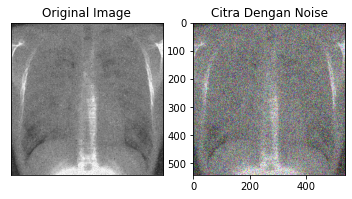

In [6]:
#citra bitwise
cv.imshow('image', imgcovid)
cv.waitKey(0)
cv.destroyAllWindows()

# Menampilkan citra dengan noise
plt.subplot(121), plt.imshow(ori_img), plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(noise_img), plt.title('Citra Dengan Noise')
plt.show()

Perbaiki Kontras
Citra
---

In [7]:
import cv2 as cv
import numpy as np
from skimage.util import random_noise

# Memuat citra
img = cv.imread("covid_image.png")

# Menambahkan noise salt-and-pepper ke citra
noise_img_snp = random_noise(img, mode='s&p', amount=0.05)

# Menambahkan noise gaussian ke citra
noise_img_gaussian = random_noise(img, mode='gaussian', mean=0, var=0.01)

# Menambahkan noise speckle ke citra
noise_img_speckle = random_noise(img, mode='speckle')

# Fungsi di atas mengembalikan citra floating-point dalam rentang [0, 1],
# maka kita mengubahnya menjadi 'uint8' dalam rentang [0, 255]
noise_img_snp = np.array(255 * noise_img_snp, dtype='uint8')
noise_img_gaussian = np.array(255 * noise_img_gaussian, dtype='uint8')
noise_img_speckle = np.array(255 * noise_img_speckle, dtype='uint8')

# Reduksi noise dengan filter rata-rata dan median
kernel_3_3 = np.ones((3, 3), np.float32) / 9

# Filter rata-rata untuk citra dengan noise salt-and-pepper
img_snp_average_filter = cv.filter2D(noise_img_snp, cv.CV_8U, kernel_3_3, (-1, -1), delta=0, borderType=cv.BORDER_DEFAULT)

# Filter median untuk citra dengan noise salt-and-pepper
img_snp_median_median = cv.medianBlur(noise_img_snp, 3)

# Filter rata-rata untuk citra dengan noise gaussian
img_gaussian_average_filter = cv.filter2D(noise_img_gaussian, cv.CV_8U, kernel_3_3, (-1, -1), delta=0, borderType=cv.BORDER_DEFAULT)

# Filter median untuk citra dengan noise gaussian
img_gaussian_median_median = cv.medianBlur(noise_img_gaussian, 3)

# Filter rata-rata untuk citra dengan noise speckle
img_speckle_average_filter = cv.filter2D(noise_img_speckle, cv.CV_8U, kernel_3_3, (-1, -1), delta=0, borderType=cv.BORDER_DEFAULT)

# Filter median untuk citra dengan noise speckle
img_speckle_median_median = cv.medianBlur(noise_img_speckle, 3)


Thresholding


In [8]:
# membaca gambar covid image 
img = cv2.imread('covid_image.png',0)

# Hitungan threshold. 
# Perhatikan nilai ambang batas bawah dan atas dari tiap fungsi 
# yang diberikan
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

# menampilkan hasil
titles = ['Gambar asli','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

Tampilkan Citra
Hasil dan Simpan

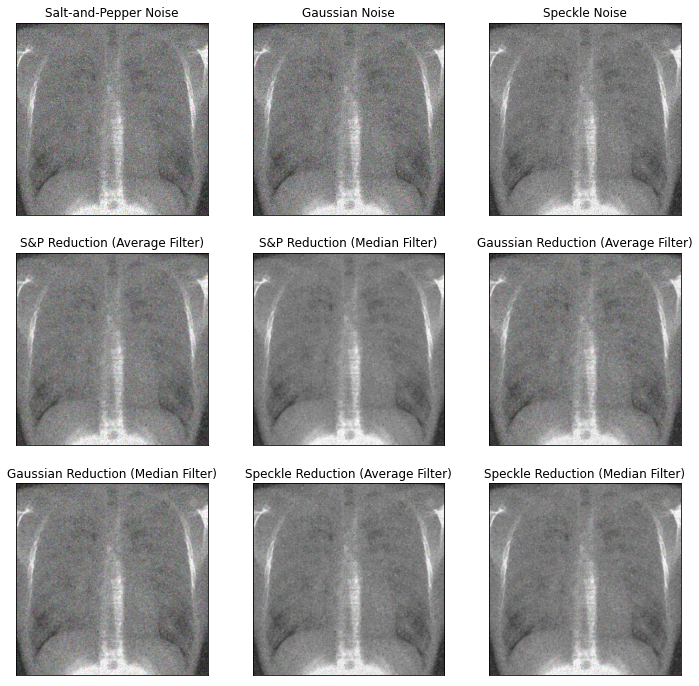

In [10]:
import cv2 as cv
import numpy as np
from skimage.util import random_noise
import matplotlib.pyplot as plt

# Menampilkan beberapa gambar dengan threshold
titles = ['Salt-and-Pepper Noise', 'Gaussian Noise', 'Speckle Noise', 'S&P Reduction (Average Filter)', 'S&P Reduction (Median Filter)', 'Gaussian Reduction (Average Filter)', 'Gaussian Reduction (Median Filter)', 'Speckle Reduction (Average Filter)', 'Speckle Reduction (Median Filter)']

# Citra yang akan ditampilkan
images = [noise_img_snp, noise_img_gaussian, noise_img_speckle, img_snp_average_filter, img_snp_median_median, img_gaussian_average_filter, img_gaussian_median_median, img_speckle_average_filter, img_speckle_median_median]

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()



Tujuan dari percobaan ini adalah untuk:

1. **Mengilustrasikan efek dari tiga jenis noise yang berbeda (salt-and-pepper, gaussian, dan speckle) pada citra.**

2. **Memperlihatkan bagaimana pengurangan noise dapat memperbaiki kualitas citra yang telah terpengaruh oleh noise.**

3. **Menunjukkan perbandingan antara dua jenis filter pengurangan noise, yaitu filter rata-rata dan filter median, dalam mengatasi berbagai jenis noise.**

4. **Memahami bagaimana noise dapat memengaruhi hasil akhir dari pengolahan citra dan pentingnya pengurangan noise dalam analisis dan pengolahan citra.**

Kesimpulan yang dapat diambil dari percobaan ini adalah:

- Noise dapat mempengaruhi kualitas citra.
- Pengurangan noise menggunakan filter dapat membantu memperbaiki kualitas citra yang terpengaruh oleh noise.
- Jenis noise yang berbeda (salt-and-pepper, gaussian, dan speckle) memiliki karakteristik yang berbeda dan memerlukan pendekatan pengurangan noise yang berbeda.

Percobaan ini membantu pemahaman tentang pentingnya pengurangan noise dalam pengolahan citra untuk menghasilkan hasil yang lebih baik, terutama dalam konteks aplikasi seperti pemrosesan medis, visi komputer, dan analisis gambar.

